<a href="https://colab.research.google.com/github/HimAir10/Pw-skillsAssignment/blob/main/Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Theory Questions**

Question 1: What is Simple Linear Regression?

Ans:
  Simple Linear Regression is a regression method in machine learning which maps the independent variable (X) with the dependent variable (Y), and tries to find the best fit line which is more closer to the the data points. It do so by adjusting the parameters  ‘m’ and ‘c’ from the straight line equation [y = mx +c], where m is the slope of the line and c is the intercept of line on the y -axis.




Question 2: What are the key assumptions of Simple Linear Regression?

Ans:
Simple Linear Regression relies on these key assumptions:
1. Linearity: The relationship between X and Y can be drawn as a straight line.
2. Independence: Each data point doesn't influence other data points.
3. Equal Variance: The spread of points around the line is the same everywhere
4.
(homoscedasticity).
Normal Errors: The mistakes in predictions follow a bell curve distribution.
5
•No Extreme Values: There aren't unusual data points that pull the line in odd directions.
6. Correct Measurement: The X variable is measured accurately.
If these assumptions aren't met, the regression results might be misleading.



Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Ans: Heteroscedasticity means the errors in a regression model have uneven spread. Think of it like this: when you plot prediction errors, they form a pattern (like a funnel shape) instead of being randomly scattered.
It's important to fix heteroscedasticity because:
1. It makes your confidence intervals and p-values wrong
2. Your statistical tests become unreliable
3. Some predictions will be much less accurate than others
4. It suggests your model might be missing important variables
To fix it, you can transform your data (like using logarithms), use weighted methods that give less importance to more variable data points, or use special robust techniques that work better with uneven error patterns.



Question 4: What is Multiple Linear Regression?

Ans:
Multiple Linear Regression (MLR) is an extension of Simple Linear Regression. It models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, ..., Xₙ).
In other words:
It tries to find the best-fitting linear equation that explains how multiple features (predictors) impact the outcome.



Question 5: What is polynomial regression, and how does it differ from linear regression?

Ans:
Polynomial Regression is a type of regression analysis in which the relationship between the independent variable X and the dependent variable Y is modeled as an nth-degree polynomial.
It’s used when data shows a non-linear pattern that cannot be captured well by a straight line.



# **Practical Questions**

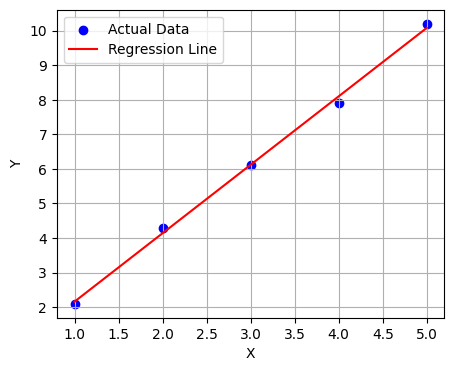

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

#Plotting
plt.figure(figsize=(5,4))
plt.scatter(X,Y,color = 'b',label = 'Actual Data')
plt.plot(X,y_pred,color = 'r', label = 'Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Create the dataset
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)
# Step 2: Define X and y
X = df[['Area', 'Rooms']]
y = df['Price']

# Step 3: Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

# Step 4: Check for multicollinearity using VIF
X_with_const = add_constant(X)  # add intercept term for VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("\nVIF Results:")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}

VIF Results:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


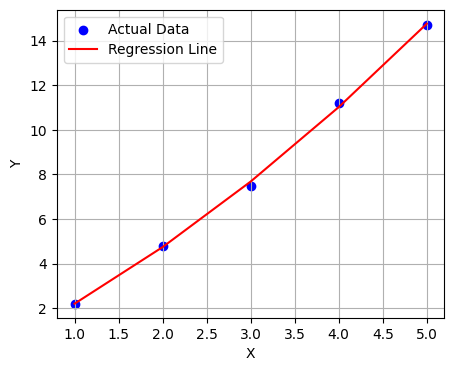

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,Y)

Y_pred = model.predict(X_poly)

plt.figure(figsize = (5,4))
plt.scatter(X,Y,color = 'b',label = 'Actual Data')
plt.plot(X,Y_pred,color = 'r', label = 'Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

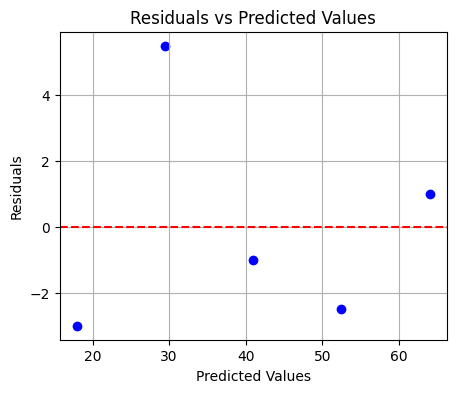

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1: Prepare the data
X = [[10], [20], [30], [40], [50]]  # must be 2D for sklearn
Y = [15, 35, 40, 50, 65]

# Step 2: Train the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Step 3: Predict Y and calculate residuals
y_pred = model.predict(X)
residuals = [y_true - y_hat for y_true, y_hat in zip(Y, y_pred)]

# Step 4: Plot residuals vs predicted values
plt.figure(figsize = (5,4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Ans:

1. Apply Transformations to Stabilize Variance (Heteroscedasticity)
Use log, square root, or Box-Cox transformations on the dependent variable (e.g., Price) to reduce variance inconsistency across observations.
2. Use Robust Regression Techniques
Switch to Weighted Least Squares (WLS) or Huber Regression, which are less sensitive to heteroscedasticity and provide more reliable standard errors.
3. Check Variance Inflation Factor (VIF) for Multicollinearity
Calculate VIF scores and drop or combine highly correlated predictors (e.g., Area and Rooms) when VIF > 5 or 10.
4. Feature Engineering and Dimensionality Reduction
Use Principal Component Analysis (PCA) or regularization methods (like Ridge or Lasso) to handle multicollinearity without removing variables.
5. Re-evaluate Model Assumptions with Residual Plots
After adjustments, plot residuals to confirm homoscedasticity and re-check multicollinearity using updated VIF values.

